# 第一章：机器学习基础
## 监督学习
监督学习是指：利用一组已知类别的样本调整分类器的参数，使其达到所要求性能的过程，也称为监督训练或有教师学习。
监督学习是从标记的训练数据来推断一个功能的机器学习任务。训练数据包括一套训练示例。在监督学习中，每个实例都是由一个输入对象（通常为矢量）和一个期望的输出值（也称为监督信号）组成。监督学习算法是分析该训练数据，并产生一个推断的功能，其可以用于映射出新的实例。一个最佳的方案将允许该算法来正确地决定那些看不见的实例的类标签。这就要求学习算法是在一种“合理”的方式从一种从训练数据到看不见的情况下形成。

## 非监督学习
在机器学习，无监督学习的问题是，在未加标签的数据中，试图找到隐藏的结构。因为提供给学习者的实例是未标记的，因此没有错误或报酬信号来评估潜在的解决方案。这区别于监督学习和强化学习无监督学习。
无监督学习是密切相关的统计数据密度估计的问题。然而无监督学习还包括寻求，总结和解释数据的主要特点等诸多技术。在无监督学习使用的许多方法是基于用于处理数据的数据挖掘方法。

## 其他资源
### 数学基础
- 知乎上的机器学习涉及的数学基础贴：https://zhuanlan.zhihu.com/p/25197792
- B站上的线性代数教学贴：https://www.bilibili.com/video/av5987715?from=search&seid=5057923081426827439
- 一个还没看的知乎live：https://www.zhihu.com/lives/926880054670159872
- 机器学习资源：https://github.com/apachecn/AiLearning



# 第二章：K-邻近算法
## 后续需要跟进的问题
- python 迭代器
- python 字典操作
- python numpy向量计算

代码参考：https://github.com/apachecn/AiLearning

### KNN 工作原理

假设有一个带有标签的样本数据集（训练样本集），其中包含每条数据与所属分类的对应关系。
输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较。
计算新数据与样本数据集中每条数据的距离。
对求得的所有距离进行排序（从小到大，越小表示越相似）。
取前 k （k 一般小于等于 20 ）个样本数据对应的分类标签。
求 k 个数据中出现次数最多的分类标签作为新数据的分类。
### KNN 通俗理解

给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的 k 个实例，这 k 个实例的多数属于某个类，就把该输入实例分为这个类。

### KNN 开发流程

收集数据：任何方法
准备数据：距离计算所需要的数值，最好是结构化的数据格式
分析数据：任何方法
训练算法：此步骤不适用于 k-近邻算法
测试算法：计算错误率
使用算法：输入样本数据和结构化的输出结果，然后运行 k-近邻算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理
KNN 算法特点

优点：精度高、对异常值不敏感、无数据输入假定
缺点：计算复杂度高、空间复杂度高
适用数据范围：数值型和标称型

## k-NN 实现

In [1]:
from numpy import *
import operator
import os
from collections import Counter

In [2]:
def createDataSet():
    """
    Desc:
        创建数据集和标签
    Args:
        None
    Returns:
        group -- 训练数据集的 features
        labels -- 训练数据集的 labels
    调用方式
    import kNN
    group, labels = kNN.createDataSet()
    """
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
def classify0(inX, dataSet, labels, k):
    """
    Desc:
        kNN 的分类函数
    Args:
        inX -- 用于分类的输入向量/测试数据
        dataSet -- 训练数据集的 features
        labels -- 训练数据集的 labels
        k -- 选择最近邻的数目
    Returns:
        sortedClassCount[0][0] -- 输入向量的预测分类 labels
    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.
    预测数据所在分类可在输入下列命令
    kNN.classify0([0,0], group, labels, 3)
    """

    # -----------实现 classify0() 方法的第一种方式----------------------------------------------------------------------------------------------------------------------------
    # 1. 距离计算
    dataSetSize = dataSet.shape[0]
    # tile生成和训练样本对应的矩阵，并与训练样本求差
    """
    tile: 列-3表示复制的行数， 行-1／2表示对inx的重复的次数
    In [8]: tile(inx, (3, 1))
    Out[8]:
    array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
    In [9]: tile(inx, (3, 2))
    Out[9]:
    array([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])
    """
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    """
    欧氏距离： 点到点之间的距离
       第一行： 同一个点 到 dataSet 的第一个点的距离。
       第二行： 同一个点 到 dataSet 的第二个点的距离。
       ...
       第N行： 同一个点 到 dataSet 的第N个点的距离。
    [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    """
    # 取平方
    sqDiffMat = diffMat ** 2
    # 将矩阵的每一行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方
    distances = sqDistances ** 0.5
    # 根据距离排序从小到大的排序，返回对应的索引位置
    # argsort() 是将x中的元素从小到大排列，提取其对应的index（索引），然后输出到y。
    # 例如：y=array([3,0,2,1,4,5]) 则，x[3]=-1最小，所以y[0]=3;x[5]=9最大，所以y[5]=5。
    # print 'distances=', distances
    sortedDistIndicies = distances.argsort()
    # print 'distances.argsort()=', sortedDistIndicies

    # 2. 选择距离最小的k个点
    classCount = {}
    for i in range(k):
        # 找到该样本的类型
        voteIlabel = labels[sortedDistIndicies[i]]
        # 在字典中将该类型加一
        # 字典的get方法
        # 如：list.get(k,d) 其中 get相当于一条if...else...语句,参数k在字典中，字典将返回list[k];如果参数k不在字典中则返回参数d,如果K在字典中则返回k对应的value值
        # l = {5:2,3:4}
        # print l.get(3,0)返回的值是4；
        # Print l.get（1,0）返回值是0；
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 3. 排序并返回出现最多的那个类型
    # 字典的 items() 方法，以列表返回可遍历的(键，值)元组数组。
    # 例如：dict = {'Name': 'Zara', 'Age': 7}   print "Value : %s" %  dict.items()   Value : [('Age', 7), ('Name', 'Zara')]
    # sorted 中的第2个参数 key=operator.itemgetter(1) 这个参数的意思是先比较第几个元素
    # 例如：a=[('b',2),('a',1),('c',0)]  b=sorted(a,key=operator.itemgetter(1)) >>>b=[('c',0),('a',1),('b',2)] 可以看到排序是按照后边的0,1,2进行排序的，而不是a,b,c
    # b=sorted(a,key=operator.itemgetter(0)) >>>b=[('a',1),('b',2),('c',0)] 这次比较的是前边的a,b,c而不是0,1,2
    # b=sorted(a,key=opertator.itemgetter(1,0)) >>>b=[('c',0),('a',1),('b',2)] 这个是先比较第2个元素，然后对第一个元素进行排序，形成多级排序。
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [4]:
 # ------------------------------------------------------------------------------------------------------------------------------------------
    # 实现 classify0() 方法的第二种方式

    # """
    # 1. 计算距离
    
    # 欧氏距离： 点到点之间的距离
    #    第一行： 同一个点 到 dataSet的第一个点的距离。
    #    第二行： 同一个点 到 dataSet的第二个点的距离。
    #    ...
    #    第N行： 同一个点 到 dataSet的第N个点的距离。

    # [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    # (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    
    # inx - dataset 使用了numpy broadcasting，见 https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    # np.sum() 函数的使用见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html
    # """
	#   dist = np.sum((inx - dataset)**2, axis=1)**0.5
    
    # """
    # 2. k个最近的标签
    
    # 对距离排序使用numpy中的argsort函数， 见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sort.html#numpy.sort
    # 函数返回的是索引，因此取前k个索引使用[0 : k]
    # 将这k个标签存在列表k_labels中
    # """
    # k_labels = [labels[index] for index in dist.argsort()[0 : k]]
	# """
    # 3. 出现次数最多的标签即为最终类别
    
    # 使用collections.Counter可以统计各个标签的出现次数，most_common返回出现次数最多的标签tuple，例如[('lable1', 2)]，因此[0][0]可以取出标签值
	# """
    # label = Counter(k_labels).most_common(1)[0][0]
    # return label

    # ------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
def classify01(inX, dataSet, labels, k):
    dist = sum((inX - dataSet)**2,axis=1)**0.5
    k_labels = [labels[index] for index in dist.argsort()[0:k]]
    label = Counter(k_labels).most_common(1)[0][0]
    return label

In [6]:
def test1():
    group, labels = createDataSet()
    print(str(group))
    print(str(labels))
    print(classify0([0.1, 0.1], group, labels, 3))
    print(classify01([0.1, 0.1], group, labels, 3))
   

In [7]:
test1()

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']
B
B


## 使用k-紧邻算法改进约会网站的配对效果

In [8]:
def file2matrix(filename):
    """
    导入训练数据
    :param filename: 数据文件路径
    :return: 数据矩阵returnMat和对应的类别classLabelVector
    """
    fr = open(filename, 'r')
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros((2，3))就是生成一个 2*3 的矩阵，各个位置上全是 0 
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename, 'r')
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回移除字符串头尾指定的字符生成的新字符串
        line = line.strip()#去掉了所有回车符
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每行的属性数据，即 features
        returnMat[index] = listFromLine[0 : 3]
        # 每行的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector


In [9]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')

分析数据

In [10]:
import matplotlib
import matplotlib.pyplot as plt

type1_x = []; type1_y = []
type2_x = []; type2_y = []
type3_x = []; type3_y = []

for i in range(len(datingLabels)):
    if datingLabels[i] == 1:
        type1_x.append(datingDataMat[i][0])
        type1_y.append(datingDataMat[i][1])
    if datingLabels[i] == 2:
        type2_x.append(datingDataMat[i][0])
        type2_y.append(datingDataMat[i][1])
    if datingLabels[i] == 3:
        type3_x.append(datingDataMat[i][0])
        type3_y.append(datingDataMat[i][1])    
    
fig = plt.figure()
# add_subplot的参数的意思的把画布分成几行几列，图像从做到右从上到下的第几块。比如（245）就是把图像分成2行4列，图像是从左右到从上到下的第五块
ax = fig.add_subplot(111)

type1 = ax.scatter(type1_x,type1_y, s = 30, c = 'black')
type2 = ax.scatter(type2_x,type2_y, s = 30, c = 'green')
type3 = ax.scatter(type3_x,type3_y, s = 30, c = 'red')

plt.xlabel("Frequent Flyier Miles Earned Per Year")
plt.ylabel("Percentage of Time Spent Playing Video Games")

ax.legend((type1,type2,type3),('DidntLike','SmallDoses','LargeDoses'), loc = 0)

#通过尝试个属性，最终发现里程数和打游戏时间占比的散点图有一定信息量
#s1 = ax.scatter(datingDataMat[:,0], datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

<Figure size 640x480 with 1 Axes>

归一化数据

In [11]:
def autoNorm(dataSet):
    """
    Desc：
        归一化特征值，消除属性之间量级不同导致的影响
    Args：
        dataSet -- 需要进行归一化处理的数据集
    Returns：
        normDataSet -- 归一化处理后得到的数据集
        ranges -- 归一化处理的范围
        minVals -- 最小值

    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    # -------第一种实现方式---start-------------------------
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (m, 1))
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    # -------第一种实现方式---end---------------------------------------------
    
    # # -------第二种实现方式---start---------------------------------------
    # norm_dataset = (dataset - minvalue) / ranges
    # # -------第二种实现方式---end---------------------------------------------
    return normDataSet, ranges, minVals


In [12]:
normDatingDataMat,ranges,minValue = autoNorm(datingDataMat)
normDatingDataMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

归一化之后是不影响数据关系的，下图就没有形变

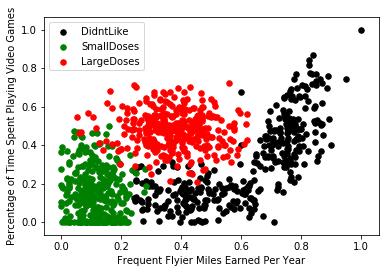

In [13]:
type1_x = []; type1_y = []
type2_x = []; type2_y = []
type3_x = []; type3_y = []

for i in range(len(normDatingDataMat)):
    if datingLabels[i] == 1:
        type1_x.append(normDatingDataMat[i][0])
        type1_y.append(normDatingDataMat[i][1])
    if datingLabels[i] == 2:
        type2_x.append(normDatingDataMat[i][0])
        type2_y.append(normDatingDataMat[i][1])
    if datingLabels[i] == 3:
        type3_x.append(normDatingDataMat[i][0])
        type3_y.append(normDatingDataMat[i][1])    
    
fig = plt.figure()
# add_subplot的参数的意思的把画布分成几行几列，图像从做到右从上到下的第几块。比如（245）就是把图像分成2行4列，图像是从左右到从上到下的第五块
ax = fig.add_subplot(111)

type1 = ax.scatter(type1_x,type1_y, s = 30, c = 'black')
type2 = ax.scatter(type2_x,type2_y, s = 30, c = 'green')
type3 = ax.scatter(type3_x,type3_y, s = 30, c = 'red')

plt.xlabel("Frequent Flyier Miles Earned Per Year")
plt.ylabel("Percentage of Time Spent Playing Video Games")

ax.legend((type1,type2,type3),('DidntLike','SmallDoses','LargeDoses'), loc = 0)

#通过尝试个属性，最终发现里程数和打游戏时间占比的散点图有一定信息量
#s1 = ax.scatter(datingDataMat[:,0], datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

测试分类器

In [14]:
def datingClassTest():
    """
    Desc：
        对约会网站的测试方法，并将分类错误的数量和分类错误率打印出来
    Args：
        None
    Returns：
        None
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1  # 测试范围,一部分测试一部分作为样本
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")  # load data setfrom file
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print('numTestVecs=', numTestVecs)
    errorCount = 0
    for i in range(numTestVecs):
        # 对数据测试，用前100个数据作为测试数据，101到最后的数据是训练数据
        classifierResult = classify0(normMat[i], normMat[numTestVecs : m], datingLabels[numTestVecs : m], 7)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        errorCount += classifierResult != datingLabels[i]
    print("the total error rate is: %f" % (errorCount / numTestVecs))
    print(errorCount)

In [15]:
datingClassTest()

numTestVecs= 100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 

## 手写识别系统

In [16]:
def img2vector(filename):
    """
    Desc：
        将图像数据转换为向量
    Args：
        filename -- 图片文件 因为我们的输入数据的图片格式是 32 * 32的
    Returns:
        returnVect -- 图片文件处理完成后的一维矩阵

    该函数将图像转换为向量：该函数创建 1 * 1024 的NumPy数组，然后打开给定的文件，
    循环读出文件的前32行，并将每行的头32个字符值存储在NumPy数组中，最后返回数组。
    """
    returnVect = zeros((1, 1024))
    fr = open(filename, 'r')
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [17]:
def handwritingClassTest():
    """
    Desc:
        手写数字识别分类器，并将分类错误数和分类错误率打印出来
    Args:
        None
    Returns:
        None
    """
    # 1. 导入数据
    hwLabels = []
    trainingFileList = os.listdir("trainingDigits") # load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    # hwLabels存储0～9对应的index位置， trainingMat存放的每个位置对应的图片向量
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 将 32*32的矩阵->1*1024的矩阵
        trainingMat[i] = img2vector('trainingDigits/%s' % fileNameStr)

    # 2. 导入测试数据
    testFileList = os.listdir('testDigits')  # iterate through the test set
    errorCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        errorCount += classifierResult != classNumStr
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount / mTest))

In [18]:
 handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answe

the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 3, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answe

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answe

the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answe

# 第三章：决策树
决策树（Decision Tree）算法是一种基本的分类与回归方法，是最经常使用的数据挖掘算法之一。我们这章节只讨论用于分类的决策树。

决策树模型呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是 if-then 规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。

决策树学习通常包括 3 个步骤：特征选择、决策树的生成和决策树的修剪。

决策树的定义：

分类决策树模型是一种描述对实例进行分类的树形结构。决策树由结点（node）和有向边（directed edge）组成。结点有两种类型：内部结点（internal node）和叶结点（leaf node）。内部结点表示一个特征或属性(features)，叶结点表示一个类(labels)。

用决策树对需要测试的实例进行分类：从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子结点；这时，每一个子结点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶结点。最后将实例分配到叶结点的类中。

信息熵 & 信息增益
熵（entropy）： 熵指的是体系的混乱的程度，在不同的学科中也有引申出的更为具体的定义，是各领域十分重要的参量。

信息论（information theory）中的熵（香农熵）： 是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值很低，相反，熵值很高。

信息增益（information gain）： 在划分数据集前后信息发生的变化称为信息增益。


说明：
**跑了下面的代码，决策树就是通过信息熵判断最优分类属性，然后根据这个属性的下面的值给数据集分类，然后递归分类，直到每一个分类里面的目标变量都是一样的。这样就构造出了一个N叉树。并且这个数是可以保存的。这样比kNN就先进了许多，kNN每次都要重新计算。而决策树进行新的向量分类的时候，只需要加载已经保存的决策树，就可以直接用来分类的。也就是说，构造决策树的过程就是这个算法的训练过程。**



### 计算给定数据集合的信息熵

In [19]:
def createDataSet():
    """
    Desc:
        创建数据集
    Args:
        无需传入参数
    Returns:
        返回数据集和对应的label标签
    """
    # dataSet 前两列是特征，最后一列对应的是每条数据对应的分类标签
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    # dataSet = [['yes'],
    #         ['yes'],
    #         ['no'],
    #         ['no'],
    #         ['no']]
    # labels  露出水面   脚蹼，注意：这里的labels是写的 dataSet 中特征的含义，并不是对应的分类标签或者说目标变量
    labels = ['no surfacing', 'flippers']
    # 返回
    return dataSet, labels

In [20]:
def calcShannonEnt(dataSet):
    """
    Desc：
        calculate Shannon entropy -- 计算给定数据集的香农熵
    Args:
        dataSet -- 数据集
    Returns:
        shannonEnt -- 返回 每一组 feature 下的某个分类下，香农熵的信息期望
    """
    # -----------计算香农熵的第一种实现方式start--------------------------------------------------------------------------------
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 下面输出我们测试的数据集的一些信息
    # 例如：<type 'list'> numEntries:  5 是下面的代码的输出
    # print(type(dataSet), 'numEntries: ', numEntries)

    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # print('-----', featVec, labelCounts)

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2
        # 计算香农熵，以 2 为底求对数
        #shannonEnt -= prob * log(prob, 2)
        shannonEnt -= prob * math.log(prob,2)
        # print('---', prob, prob * log(prob, 2), shannonEnt)
    # -----------计算香农熵的第一种实现方式end--------------------------------------------------------------------------------

    # # -----------计算香农熵的第二种实现方式start--------------------------------------------------------------------------------
    # # 统计标签出现的次数
    # label_count = Counter(data[-1] for data in dataSet)
    # # 计算概率
    # probs = [p[1] / len(dataSet) for p in label_count.items()]
    # # 计算香农熵
    # shannonEnt = sum([-p * log(p, 2) for p in probs])
    # # -----------计算香农熵的第二种实现方式end--------------------------------------------------------------------------------
    return shannonEnt


In [21]:
#myDat,labels = createDataSet()

In [22]:
#calcShannonEnt(myDat)

In [23]:
def splitDataSet(dataSet, index, value):
    """
    Desc：
        划分数据集
        splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet  -- 数据集                 待划分的数据集
        index -- 表示每一行的index列        划分数据集的特征
        value -- 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index 列为 value 的数据集【该数据集需要排除index列】
    """
    # -----------切分数据集的第一种方式 start------------------------------------
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            '''
            请百度查询一下： extend和append的区别
            list.append(object) 向列表中添加一个对象object
            list.extend(sequence) 把一个序列seq的内容添加到列表中
            1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            result = []
            result.extend([1,2,3])
            print(result)
            result.append([4,5,6])
            print(result)
            result.extend([7,8,9])
            print(result)
            结果：
            [1, 2, 3]
            [1, 2, 3, [4, 5, 6]]
            [1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    # -----------切分数据集的第一种方式 end------------------------------------

    # # -----------切分数据集的第二种方式 start------------------------------------
    # retDataSet = [data[:index] + data[index + 1:] for data in dataSet for i, v in enumerate(data) if i == index and v == value]
    # # -----------切分数据集的第二种方式 end------------------------------------
    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    """
    Desc:
        选择切分数据集的最佳特征
    Args:
        dataSet -- 需要切分的数据集
    Returns:
        bestFeature -- 切分数据集的最优的特征列
    """

    # -----------选择最优特征的第一种方式 start------------------------------------
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # label的信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取每一个实例的第i+1个feature，组成list集合
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
    # -----------选择最优特征的第一种方式 end------------------------------------

    # # -----------选择最优特征的第二种方式 start------------------------------------
    # # 计算初始香农熵
    # base_entropy = calcShannonEnt(dataSet)
    # best_info_gain = 0
    # best_feature = -1
    # # 遍历每一个特征
    # for i in range(len(dataSet[0]) - 1):
    #     # 对当前特征进行统计
    #     feature_count = Counter([data[i] for data in dataSet])
    #     # 计算分割后的香农熵
    #     new_entropy = sum(feature[1] / float(len(dataSet)) * calcShannonEnt(splitDataSet(dataSet, i, feature[0])) \
    #                    for feature in feature_count.items())
    #     # 更新值
    #     info_gain = base_entropy - new_entropy
    #     print('No. {0} feature info gain is {1:.3f}'.format(i, info_gain))
    #     if info_gain > best_info_gain:
    #         best_info_gain = info_gain
    #         best_feature = i
    # return best_feature
    # # -----------选择最优特征的第二种方式 end------------------------------------



In [24]:
def majorityCnt(classList):
    """
    Desc:
        选择出现次数最多的一个结果
    Args:
        classList label列的集合
    Returns:
        bestFeature 最优的特征列
    """
    # -----------majorityCnt的第一种方式 start------------------------------------
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 倒叙排列classCount得到一个字典集合，然后取出第一个就是结果（yes/no），即出现次数最多的结果
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # print('sortedClassCount:', sortedClassCount)
    return sortedClassCount[0][0]
    # -----------majorityCnt的第一种方式 end------------------------------------

    # # -----------majorityCnt的第二种方式 start------------------------------------
    # major_label = Counter(classList).most_common(1)[0]
    # return major_label
    # # -----------majorityCnt的第二种方式 end------------------------------------

In [25]:
def createTree(dataSet, labels):
    """
    Desc:
        创建决策树
    Args:
        dataSet -- 要创建决策树的训练数据集
        labels -- 训练数据集中特征对应的含义的labels，不是目标变量
    Returns:
        myTree -- 创建完成的决策树
    """
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet) # 得到的是一个index
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()，用这种递归的方式构建决策树，递归真是蛋疼
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print('myTree', value, myTree)
    return myTree

### 调用试试

In [26]:
myDat,labels = createDataSet()

In [27]:
myTree = createTree(myDat,labels)

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0


In [28]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 用Matplotlib绘制属性图
具体没自己看，后面就拿来用吧，就是用递归构建树和画树那一套，不是重点，有时间再看了。

In [36]:
import matplotlib.pyplot as plt

# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


In [38]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        # ----------写法1 start ---------------
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # ----------写法1 end ---------------

        # ----------写法2 start --------------
        # thisDepth = 1 + getTreeDepth(secondDict[key]) if type(secondDict[key]) is dict else 1
        # ----------写法2 end --------------
        # 记录最大的分支深度
        maxDepth = max(maxDepth, thisDepth)
    return maxDepth

In [39]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', \
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

In [40]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [41]:
def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    cntrPt = (plotTree.xOff + (1 + numLeafs) / 2 / plotTree.totalW, plotTree.yOff)
    # print(cntrPt)
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstStr = list(myTree.keys())[0]
    # 可视化Node分支点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]
    plotTree.yOff = plotTree.yOff - 1 / plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1 / plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1 / plotTree.totalD

In [42]:
def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='green')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

In [43]:
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]

In [55]:
myTree = retrieveTree(1)

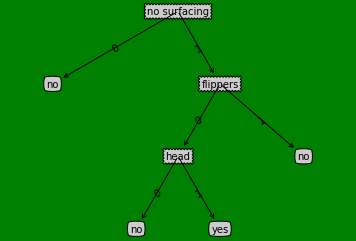

In [56]:
createPlot(myTree)

##  使用决策树执行分类


In [57]:
def classify(inputTree, featLabels, testVec):
    """
    Desc:
        对新数据进行分类
    Args:
        inputTree  -- 已经训练好的决策树模型
        featLabels -- Feature标签对应的名称，不是目标变量
        testVec    -- 测试输入的数据
    Returns:
        classLabel -- 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [58]:
myDat,labels = createDataSet()


In [59]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [60]:
labels

['no surfacing', 'flippers']

In [61]:
myTree = retrieveTree(0)

In [62]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [63]:
classify(myTree,labels,[1,0])

+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 0 >>> no


'no'

In [66]:
classify(myTree,labels,[1,1])

+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 1 >>> yes


'yes'

## 决策树的存储

In [67]:
def storeTree(inputTree, filename):
    """
    Desc:
        将之前训练好的决策树模型存储起来，使用 pickle 模块
    Args:
        inputTree -- 以前训练好的决策树模型
        filename -- 要存储的名称
    Returns:
        None
    """
    import pickle
    # -------------- 第一种方法 start --------------
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    # -------------- 第一种方法 end --------------

    # -------------- 第二种方法 start --------------
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)
    # -------------- 第二种方法 start --------------


def grabTree(filename):
    """
    Desc:
        将之前存储的决策树模型使用 pickle 模块 还原出来
    Args:
        filename -- 之前存储决策树模型的文件名
    Returns:
        pickle.load(fr) -- 将之前存储的决策树模型还原出来
    """
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [68]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [70]:
storeTree(myTree,'myTreeeeee')

In [71]:
yourTree = grabTree('myTreeeeee')

In [72]:
yourTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [77]:
def fishTest():
    """
    Desc:
        对动物是否是鱼类分类的测试函数，并将结果使用 matplotlib 画出来
    Args:
        None
    Returns:
        None
    """
    # 1.创建数据和结果标签
    myDat, labels = createDataSet()
    # print(myDat, labels)

    # 计算label分类标签的香农熵
    # calcShannonEnt(myDat)

    # # 求第0列 为 1/0的列的数据集【排除第0列】
    # print('1---', splitDataSet(myDat, 0, 1))
    # print('0---', splitDataSet(myDat, 0, 0))

    # # 计算最好的信息增益的列
    # print(chooseBestFeatureToSplit(myDat))

    import copy
    myTree = createTree(myDat, copy.deepcopy(labels))
    print(myTree)
    # [1, 1]表示要取的分支上的节点位置，对应的结果值
    print(classify(myTree, labels, [1, 1]))

    # 画图可视化展现
    createPlot(myTree)

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 1 >>> yes
yes


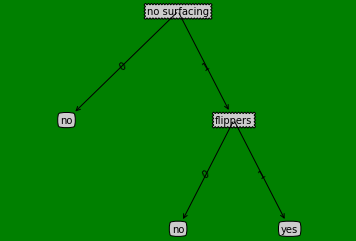

In [78]:
fishTest()

## 使用决策树预测隐形眼镜类型

In [108]:
def ContactLensesTest():
    """
    Desc:
        预测隐形眼镜的测试代码，并将结果画出来
    Args:
        none
    Returns:
        none
    """

    # 加载隐形眼镜相关的 文本文件 数据
    fr = open('lenses.txt')
    # 解析数据，获得 features 数据
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    print(lenses)
    # 得到数据的对应的 Labels
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    # 使用上面的创建决策树的代码，构造预测隐形眼镜的决策树
    lensesTree = createTree(lenses, lensesLabels)
    print(lensesTree)
    # 画图可视化展现
    createPlot(lensesTree)
    ##


[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

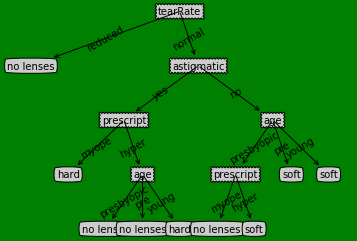

In [109]:
ContactLensesTest()